# Krzywe eliptyczne

## Wzór ogólny, zasada działania

Krzywe eliptyczne zadane są wzorem ogólnym Weierstrassa:

\begin{equation}
  Y^2 = X^3 + aX + b
\end{equation}

Przykłady takich krzywych to:

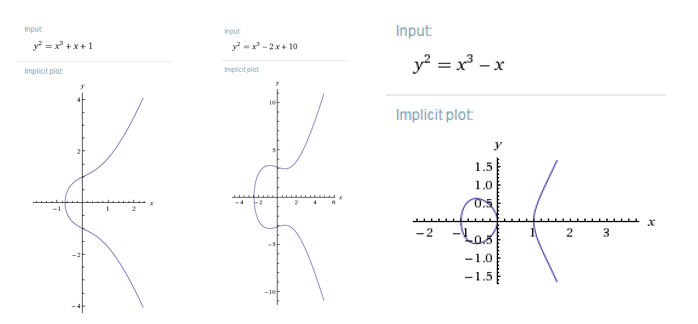


Interpretacja geometryczna dodawania dwóch puntków na krzywej ($O_1 + O_2$):

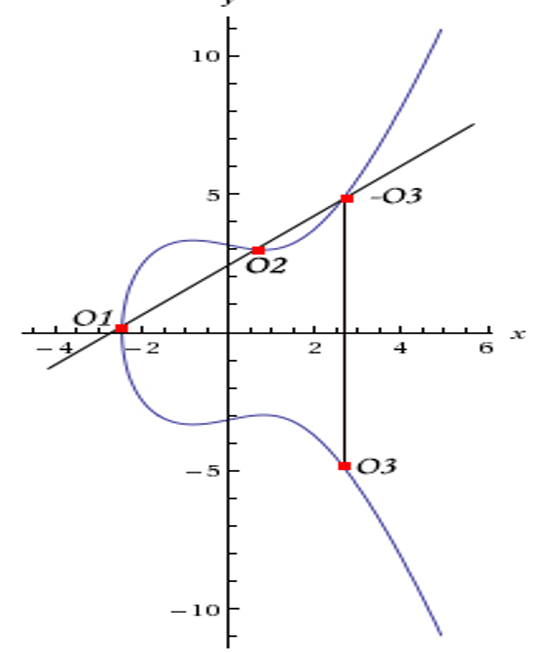

Czyli co musimy zrobić: poprowadzić prostą przechodzącą przez punkty $O_1$ i $O_2$ i znaleźć punkt przecięcia z krzywą. Punkt znajdujący się w punkcie przecięcia z krzywą to **odwrotność** tego punktu którego szukamy, czyli $-O_3$. W arytmetyce krzywych eliptycznych odwrotność punktu to punkt symetryczny względem osi OX, a więc aby znaleźć punkt $O_3$ należy poprawadzić prostą prostopadłą do osi OX przechodzącą przez punkt $-O_3$ i tam gdzie przecina się ona z krzywą otrzymujemy punkt $O_3$. Formalnie:

\begin{equation}
  -O3 = -(O3_x, O3_y) = (O3_x, -O3_y).
\end{equation}

Drugą operacją, którą możemy wykonać jest dublowanie punktu ($2O_1 = O_2$), co graficznie można przedstawić jako:

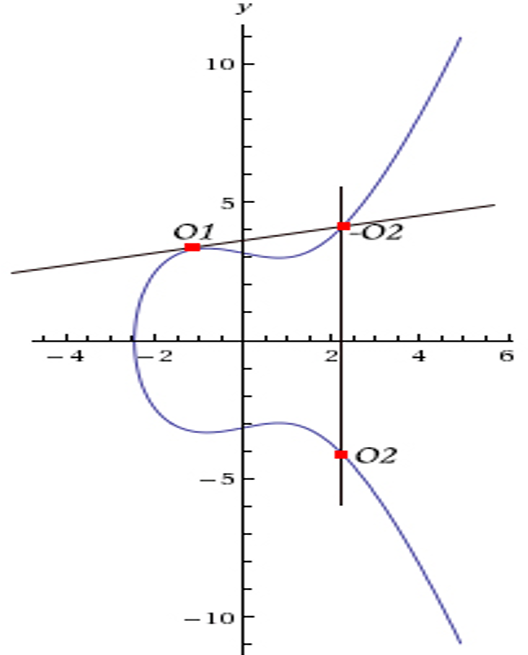

Czyli tym razem tworzymy styczną do krzywej w punkcie $O_1$, a punkt przecięcia stycznej z krzywą to $-2O_1 = -O_2$. Znowu musimy odbić po współrzędnej *y* i otrzymujemy $2O_1$ czyli $O_2$.

A więc możemy wykonać tylko te dwie operacje, dodawania i dublowania. Ten problem jest nam już znany, zetknęliśmy się z nim programując operację MixColumns dla szyfu AES. Tu jest nie inaczej.

Pytanie: a co jeżeli chcemy dodać dwa punkty: $P + (-P)$? Spójrzmy na przykład:

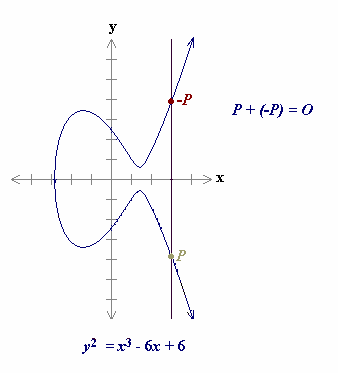

Tak naprawdę nie możemy tego dokonać zgodnie z przyjętym algorytmem. Wynikiem działania $P + (-P)$ jest tzw. punkt $O$ (czyli $P + (-P) = O$). Punkt $O$ jest tak zwanym *additive identity* i taki punkt ma każda krzywa. W naszej algebrze taką wartością jest zero, gdyż $x + 0 = x$. W krzywych eliptycznych podobnie: $P + O = P$.

W przypadku dublowania punktu $P$ problem się pojawia gdy $P_y = 0$, czyli punkt $P$ leży zarówno na krzywej, jak i na osi OX. 

Podsumowując: dodawać można punkty nieprzeciwne, a dublować te których współrzedna $y$ nie jest równa 0.

Mamy jeszcze jedno założenie, kórego musimy się trzymać. Mianowicie współrzędne $a$ oraz $b$ krzywej muszą spełniać warunek:

\begin{equation}
  4a^3 + 26b^2 \neq 0
\end{equation}

Warunek ten jest niezbędny do tego, aby krzywa tworzyła jakąkolwiek grupę cykliczną. Bo docelowo będziemy chceili używać takich krzywych, które właśnie grupy tworzą. Możesz o tym pomyśleć jak o arytmetyce modularnej. Np. wartości mod 6 tworzą grupę, w której skład wchodzą cyfry: 0, 1, 2, 3, 4, 5 i cokolwiek byśmy nie zrobili, otrzymamy w ciele mod 6 jedną z takich cyfr. Tu chcemy zastąpić nasze "mod" krzywymi - przynajmniej częściowo, o tym za moment.

## Krzywe zdefiniowane nad ciałem Fp

To co opisaliśmy w poprzednim rozdziale to krzywe ciągłe, nie będą one nam w tej formie użyteczne. Tu przychodzi nam z pomocą nowy rodzaj krzywych, zdefiniowanych jako:

\begin{equation}
Y^2 = X^3 + aX + b \text{ mod } p
\end{equation}

z warunkiem:

\begin{equation}
4a^3 + 26b^2 \text{ mod } p \neq 0
\end{equation}

wygląda znajomo, a bardzo mocno się różni. Wartość $p$ to duża liczba pierwsza o długości bitowej $pbits$. Krzywe zadane powyższym wzorem oznaczane są przez NIST jako P-$pbits$, czyli dla przykładu P-256. Tego typu krzywe definiują skończony zbiór punktów, a więc są dyskretne a nie ciągłe. Przykład:

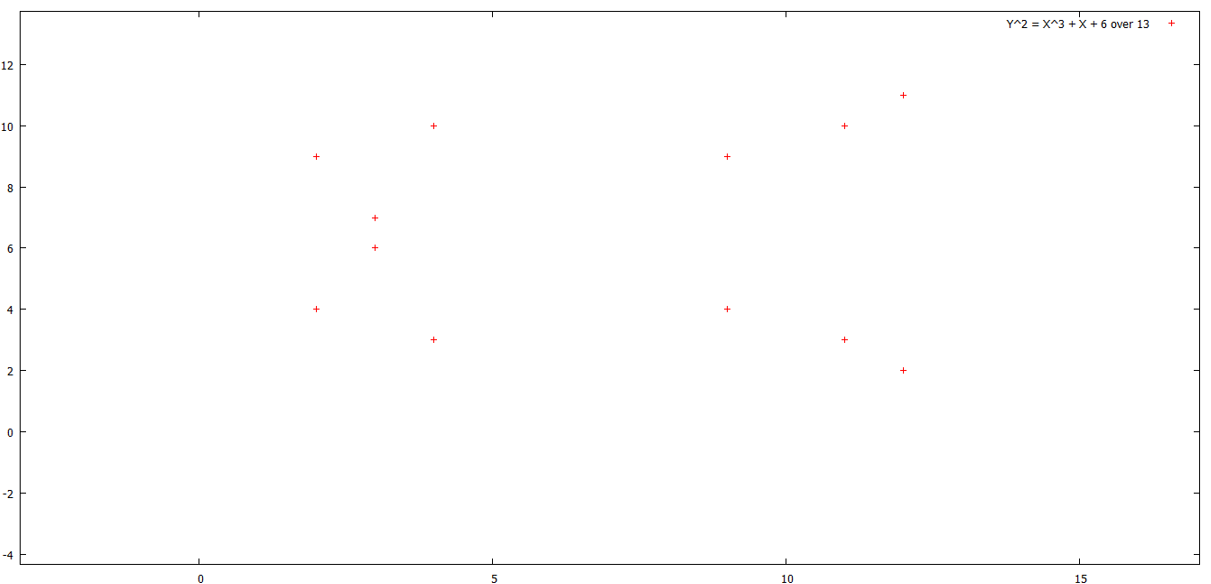

Oczywiście to jest krzywa bardzo mała, my będziemy korzystali z większych.

No dobrze, ale mówiłem, że chcemy zastąpić nasze klasyczne "mod" znane chociażby z RSA, a tutaj też ono występuje, to jak to jest? Ano jest ono niezbędne do dyskretyzacji i faktycznie nakłada ono pewne ograniczenia na wartości $Y$ i $X$, ale obliczenia w ciele krzywej eliptycznej będą wyglądały zupełnie inaczej.

Rząd krzywej eliptycznej oznaczamy jako $\#E$ i jest to całkowita liczba punktów jaką ona generuje (wliczając w to punkt $O$). Na przykład krzywa przedstawiona na powyższym obrazku generuje 12 różnych punktów, plus punkt $O$, który ma każda krzywa. A więc jest ich razem 13. Tak się składa, że jest ona zdefiniowana w ciele $F_{13}$ (czyli $p = 13$). I tu przechodzimy do pierwszej problematycznej kwestii. Otóż nie musi tak być i dla dużych wartości $p$ często tak nie jest, że rząd krzywej równy jest $p$. O problemach i zaletach krzywych opowiemy sobie za chwilę, najpierw spójrzmy jednak jak efektywnie dodawać i dublować punkty w ciele Fp. Na ten moment nie przejmuj się skąd wziąć $\#E$, przyjmij natomiast, że jest to liczba pierwsza.

### Dodawanie punktów w ciele Fp

Niech $O1 = (O1_x, O1_y)$, oraz niech $O2 = (O2_x, O2_y)$. Niech $O1 + O2 = O3 = (O3_x, O3_y)$. Aby obliczyć $O3$ należy:

1) Oblicz:
\begin{equation}
  s = \frac{O1_y - O2_y}{O1_x - O2_x} \text{ mod } \#E.
\end{equation}

2) Oblicz: $O3_x = s^2 - O1_x - O2_x \text{ mod } \#E$.

3) Oblicz: $O3_y = (-O1_y + s(O1_x - O3_x)) \text{ mod } \#E$.

Uwaga: punkt pierwszy zakłada dzielenie ale **w ciele modulo**. Zastanów się jak to prawidłowo wykonać, a jeżeli utkniesz wórć do laboratoriów z RSA (algorytm generowania kluczy RSA). 

### Dublowanie w ciele Fp

Niech $O1 = (O1_x, O1_y)$, oraz niech $2O1 = O2 = (O2_x, O2_y)$. Aby obliczyć $O2$ należy:

1) Oblicz:

\begin{equation}
  s = \frac{3O1_x^2 + a}{2O1_y} \text{ mod } \#E.
\end{equation}

2) Oblicz: $O2_x = s^2 - 2O1_x \text{ mod } \#E$.

3) Oblicz: $O2_y = (-O1_y + s(O1_x - O2_x)) \text{ mod } \#E$.

Tutaj taka sama uwaga jak powyżej, czyli uwaga na dzielenie w ciele modulo.

Binarne potęgowanie!

## Krzywe Fp - zalety i wady ECC

Zastanówmy się teraz, co nam właściwie krzywe dają. Otóż ich główną i wielką zaletą jest ich bezpieczeństwo. Bardzo ładne porównanie RSA z algorytmami opartymi o krzywe jest [tu](https://cheapsslsecurity.com/p/ecc-vs-rsa-comparing-ssl-tls-algorithms/). Spójrzmy na tabelę (ECC to skrót od *Elliptic Curve Cryptography*):

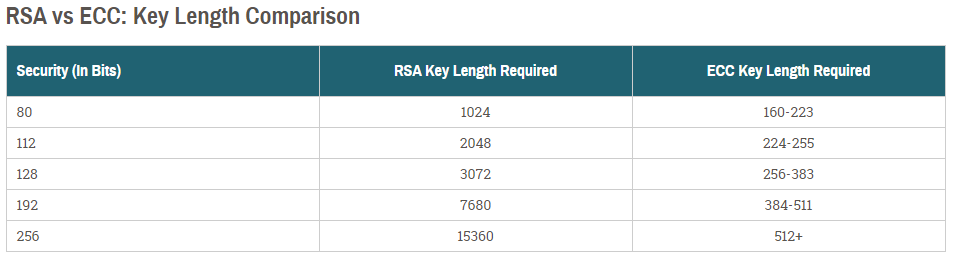


Poprzez *key-length* autorzy rozumieją bitową długość liczby pierwszej $p$. W powyższym porównaniu ECC miażdży RSA, to znaczy RSA-2048 oferuje podobny poziom bezpieczeństwa co krzywa P-255. Krzywa P-512 (i większe) oferują 256 bitów bezpieczeństwa. Jest to poziom kryptografii postkwantowej. SHA3-512 oferuje tyle samo bitów bezpieczeństwa dla algorytmów opartych na odponorści na kolizje, natomiast SHA3-256 oferuje tyle samo bitów bezpieczeństwa dla algorytmów opartych na bezpieczeństwie pierwszego preobrazu. To są bardzo dobre wartości. Zauważ, że RSA wymagałoby długości klucza równej 15360 bitów, aby dorównać P-512.

Spójrzmy na pozostałe różnice pomiędzy RSA i ECC:

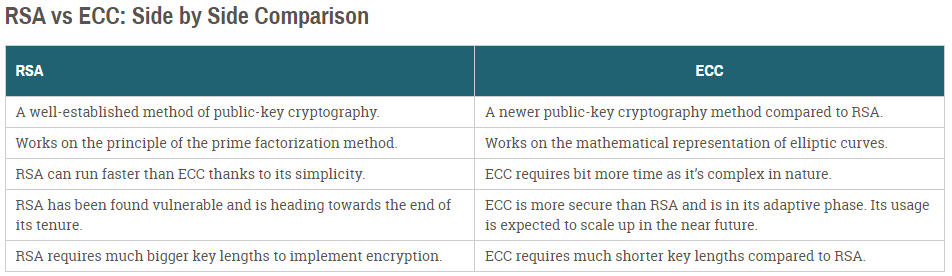

Słowem podsumowania: ECC jest nowsze (a więc mniej zbadane), jest wolniejsze, ale bezpieczniejsze niż RSA i wymaga znacznie mniejszych długości klucza.

To teraz przejdźmy do wad. Niestety tu już tak kolorowo nie będzie. 

1. Jak już wspominałem, krzywe definiujemy nad dużą liczbą pierwszą $p$ i generują one $\#E$ punktów, gdzie bardzo często (dla konkretnych $p$ w zasadzie zawsze) $\#E \neq p$. Problem polega na tym, że $\#E$ musi także być liczbą pierwszą. Jeżeli nie będzie, to nie obliczymy inwersji modularnej przy dodawaniu i dublowaniu punktów. Pamietasz te ułamki w ciele modulo opisane wyżej? No właśnie. GCD mianownika takiego ułamka i $\#E$ musi być równe 1, a więc aby sobie to zagwarantować $\#E$ powinno być liczbą pierwszą. Jak więc wygenerować taką krzywą aby być pewnym, że $\#E$ jest liczbą pierwszą? Nie ma żadnej efektywnej i szybkiej metody.

2. Nawet jak już sobie zapewnimy, że $\#E$ jest liczbą pierwszą, to do dodawania i dublowania punktów potrzeba nam znać konkretną wartość liczbową $\#E$, a nie tylko wiedzieć, że jest pierwsze. Jak więc policzyć dla dużych krzywych liczbę punktów, które one generują? Nie ma żadnej efektywnej i szybkiej metody.

3. Chyba najgorsze ze wszystkich. Otóż jak już uda nam się rozwiązać oba powyższe -- czyli mamy konkretną wartość $\#E$ i wiemy, że jest pierwsze, to mamy gwarancję, że krzywa generuje grupę cykliczną. Cykliczną, czyli operacja dokonana na dwóch dowolnych punktach krzywej da nam inny punkt na tejże krzywej. Problem polega na tym, że dany punkt na krzywej (oznaczmy go jako $G$) może być generatorem podgroupy punktów z całości zbioru $\#E$. Czyli jak do $G$ będziemy coś dodawali, to będziemy się kręcić w koło w jakiejś podgrupie punktów, z której nigdy nie wyjdziemy. Wówczas taką podgrupę oznaczamy jako $\#G$ i mówimy, że jest to rząd generatora $G$, gdzie oczywiście $\#G < \#E$, albo nawet $\#G << \#E$. Takich podgrup i ich generatorów może być wiele. Ile? Nie ma żadnej efektywnej i szybkiej metody sprawdzenia tego.

4. Dla danego punktu $G$ i krzywej obliczamy ich tzw. cofactor $h = \frac{\#E}{\#G}$. Rząd generatora zawsze będzie dzielnikiem rzędu krzywej. Idealna sytuacja ma miejsce wtedy, kiedy dla **dowolnego** punktu $G$ na krzywej zachodzi własność, że $\#G = \#E$, czyli cofactor $h = 1$. Wówczas "podgrupą" dla dowolnego punktu na krzywej, jest cała krzywa. Jak to osiągnąć aby $h$ było 1 i jak to sprawdzić? Dobrze się domyślasz.

5. Jak się tak zastanowić, to samo znalezienie punktu na dużej krzywej jest trudne samo w sobie. Musisz tak dobrać szukane $x$, aby po podstawieniu do wzoru (znamy $a$, $b$ i $p$) wynik był pierwiastkowalny (pamiętaj, że mamy tam $Y^2 = ...$). Przykład wyszukiwania punktu na bardzo małej krzywej znajdziesz [tu](https://www.youtube.com/watch?v=_QR-kTypf4E).

6. Last but not least. Kryptografia ECC cały czas się rozwija i okazuje się, że krzywe można definiować również i na inne sposoby. Przykładem są tzw. krzywe F2m, czyli zdefiniowane nad ciałami binarnymi. Swego czasu był na nie hype, jako na alternatywę dla Fp, ale... coś nie zadziałało. Pomimo ich dynamicznego rozwoju przez wiele lat, zostały oficjalnie uznane za *deprecated*: ,,Although
the specifications for elliptic curves over binary fields are included, these curves are now deprecated. It is strongly recommended to use the other prime curves'' [NIST SP 800-186 - Executive Summary](https://nvlpubs.nist.gov/nistpubs/SpecialPublications/NIST.SP.800-186.pdf). Ciekawostka - informacja o tym została podana w lutym 2023, a więc całkiem niedawno.



To teraz skąd wziąć krzywe spełniające wszystkie powyższe warunki? Z pomocą przychodzi NIST w dokumencie [FIPS 186-5](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf). Co ciekawe ten dokument także był aktualizowany w lutym roku 2023, a następna aktualizacja jest planowana na luty 2024. W każdym razie nas interesuje dodadek D, w szczególności rozdział D.1.2. Mamy tam pięc krzywych Fp, których cofactor $h = 1$. Autorzy podają wszystkie niezbędne dane, tj.:

1. $p$ - liczbę pierwszą nad którą definiujemy krzywą.
2. $a$ - jest równe -3 dla wszystkich krzywych (podane raz, na samym początku we wzorze ogólnym).
3. $b$ - parametr ze wzoru ogólnego.
4. $n$ - NIST tak oznaczył rząd krzywej, czyli $\#E$. My będziemy się trzymać $\#E$, gdyż jest to (wg mnie) czytelniejsza notacja. Jako $n$ oznaczamy często inne rzeczy, jak długość zwracanego skrótu przez funkcję skrótu, czy wartość modulo w RSA. W każdym razie, ponieważ dla tych krzywych $h = 1$, podana przez NIST wartość $\#E$ jest rzędem danej krzywej i każdego punktu do niej należącego. Czyli każdy punkt tej krzywej może być generatorem.
5. $G_x$ oraz $G_y$ - to jest przykładowy punkt na danej krzywej. NIST zastrzega, że użytkownik może sobie znaleźć dowolny inny własny, gdyż każdy punkt leżący na krzywej może być generatorem.

**Uwaga plotka:** krąży opinia, że krzywe podane w oficjalnej specyfikacji NISTu mają backdoory. Z jednej strony, nie widziałem żadnego oficjalnego dowodu na tę informację. Z drugiej strony, jeżeli jakaś amerykańska agencja... powiedzmy.. NSA, by sobie takie backdoory zagwarantowała, to czy dostarczyłaby dowody na samą siebie? Ciężko orzec na ten moment, czy ta wiadomość to informacja, czy może właśnie dezinformacja -- ale tak czy owak warto to mieć na uwadze i temat śledzić. Oglądnij [ten](https://www.youtube.com/watch?v=nybVFJVXbww) film jeżeli Cię temat ciekawi.

## Przygotowanie danych

Zaimplementujmy niezbędne do dalszego działania funkcje. Weźmy tą krzywą, która na ten moment oferuje maskymalne bezpieczeństwo, czyli P-512. Zaczniemy od bibliotek, które mogą się przydać.

In [1]:
import Crypto.Util.number as cu
import hashlib as hl
import math
import random

Teraz klasa, która będzie nam przechowywała punkt. Taką proponuję, ale jak chcesz to modyfikuj do woli.

In [2]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __str__(self):
    return f"Point - x={self.x}, y={self.y}"

No i finalnie parametry naszej krzywej P-512. 

In [3]:
p = 6864797660130609714981900799081393217269435300143305409394463459185543183397656052122559640661454554977296311391480858037121987999716643812574028291115057151

hashE = 6864797660130609714981900799081393217269435300143305409394463459185543183397655394245057746333217197532963996371363321113864768612440380340372808892707005449

a = -3

b = 0x051953eb9618e1c9a1f929a21a0b68540eea2da725b99b315f3b8b489918ef109e156193951ec7e937b1652c0bd3bb1bf073573df883d2c34f1ef451fd46b503f00

G = Point(
    0xc6858e06b70404e9cd9e3ecb662395b4429c648139053fb521f828af606b4d3dbaa14b5e77efe75928fe1dc127a2ffa8de3348b3c1856a429bf97e7e31c2e5bd66,
    0x11839296a789a3bc0045c8a5fb42c7d1bd998f54449579b446817afbd17273e662c97ee72995ef42640c550b9013fad0761353c7086a272c24088be94769fd16650
)

Punkt G będzie naszym generatorem. Będzie wykorzystywany w każdym omawianym kryptosystemie. **Wszystkie** powyższe parametry są publiczne.

Ostatnia ważna rzecz dotycząca krzywych eliptycznych. Otóż okazuje się, że potęgowanie możemy w nich traktować jak mnożenie. W zasadzie potęgowania jako takiego w ogóle nie ma. To jest o tyle ważne, że większość kryptosystemów asymetrycznych wykorzystuje potęgowanie. Czyli np. dla naturalnej liczby $x$ operację $G^x$ zapisujemy po prostu jako $xG$.

In [4]:
def add_points(A, B):
    if A.x == B.x:
        if A.y == B.y:
            return double_point(A)
        else:
            return None
    s = ((A.y - B.y) * cu.inverse((A.x - B.x) % p, p)) % p
    x = (s ** 2 - A.x - B.x) % p
    y = (-A.y + s * (A.x - x)) % p
    return Point(x, y)


def double_point(A):
    if A.y == 0:
        return None
    s = ((3 * A.x ** 2 + a) * cu.inverse((2 * A.y) % p, p)) % p
    x = (s ** 2 - 2 * A.x) % p
    y = (-A.y + s * (A.x - x)) % p
    return Point(x, y)

def mul_point(k, A):
    if k == 0:
        return Point(0, 0)
    i = 0
    res = None
    while k > 0:
        t = k % 2
        k = k // 2
        if t == 0:
            i += 1
            continue
        tmp = A
        for _ in range(i):
            tmp = double_point(tmp)
        if res is None:
            res = tmp
        else:
            res = add_points(res, tmp)
        i += 1
    return res

In [5]:
print(mul_point(10, G))

Point - x=5375460404355022005936344137910919641482040501042631812229106559568140729369345497476837707660889191626168303541735277230613470977508429228294991448237880096, y=6588135334138314282252915335789429562328467280057335182605115845427333280489083939697175013949068040137109843930550149723252770088030396786860186457851479897


## Kryptosystemy ECC

Wbrew pozorom nie ma ich tak wiele. W zasadzie popularne są trzy: El-Gamal do szyfrowania, ECDSA do podpisu cyfrowego oraz EC Diffie-Helman do wymiany kluczy. ECC było też wykorzystywane jako PRNG (Pseudo-Random Number Generator), ale obecnie to nie jest zalecane. Przypominam, wszystkie parametry krzywej i punkt G są znane.

### El-Gamal

Wynaleziony w latach 80' przez Egipcjanina Tahera ElGamal'a. W oryginale twórca w ogóle nie zakładał zastosowania ECC, po prostu przedstawił algorytm. Szybko się jednak okazało, że można go zaadpotować do krzywych. Przyjrzyjmy się więc jak to działa.

Przygotowanie danych:

1. Wybierz losową liczbę naturalną $1 < x < \#E$. Wartość $x$ jest kluczem prywatnym.
2. Oblicz punkt: $A = xG$. Punkt $A$ jest kluczem publicznym.

Szyfrowanie:

1. Wybierz punkt $M$ na krzywej. To będzie wiadomość do zaszyfrowania.
2. Wybierz wartość naturalną typu nonce: $1 < k < \#E$.
3. Oblicz punkt: $c_1 = kG$.
4. Oblicz punkt: $c_2 = kA + M$.

Kryptogram stanowią punkty $c_1$ oraz $c_2$.

Deszyfrowanie:

1. Oblicz punkt: $M = c_2 - xc_1$.

W powyższym schemacie jest jeden spory problem. Mianowicie w oryginale zaszyfrować można tylko wiadomość będącą **punktem na krzywej**. Nie ma żadnej prostej metody mapowania prawdziwej wiadomości, którą chcemy zaszyfrować na punkt na krzywej. Pamiętaj, że taka operacja musiałaby być funkcją dwukierunkową. Ten problem trzeba było jakoś rozwiązać.

### MV-ElGamal

MV-ElGamal jest propozycją zaprezentowaną przez CERTICOM. CERTICOM jest korporacją mocno związaną z branżą cybersec, ale nie jest ona związana w żaden sposób z certyfikacją. W każdym razie ich propozcyja omija problem mapowania wiadomości na krzywą.

Przygotowanie danych:

1. Wybierz losową liczbę naturalną $1 < x < \#E$. Wartość $x$ jest kluczem prywatnym.
2. Oblicz punkt: $A = xG$. Punkt $A$ jest kluczem publicznym.

Szyfrowanie:

1. Albo podziel wiadomość $M$ na dwie części, $M_1$ i $M_2$, albo przygotuj dwie wiadomości do zaszyfrowania: $M_1$ i $M_2$.
2. Wybierz wartość naturalną typu nonce: $1 < k < \#E$.
3. Oblicz punkty: $R = kG$ oraz $S = kA$.
4. Oblicz wartość: $c_1 = S_xM_1 \text{ mod } p$.
5. Oblicz wartość: $c_2 = S_yM_2 \text{ mod } p$.

Kryptogram stanowią wartości $c_1$, $c_2$ oraz punkt $R$.

Deszyfrowanie:

1. Oblicz punkt: $T = xR$.
2. Oblicz wartość: $M_1 = T_x^{-1}c_1 \text{ mod } p$.
3. Oblicz wartość: $M_2 = T_y^{-1}c_2 \text{ mod } p$

In [6]:
x = random.randint(2**8 + 1, hashE - 1)
A = mul_point(x, G)

In [7]:
def mv_el_gamal_encrypt(M: str):
    k = random.randint(2**8 + 1, hashE - 1)
    size = len(M)
    M1 = M[:size//2]
    M2 = M[size//2:]
    m1 = int.from_bytes(M1.encode("utf-8"))
    m2 = int.from_bytes(M2.encode("utf-8"))
    R = mul_point(k, G)
    S = mul_point(k, A)
    c1 = (S.x * m1) % p
    c2 = (S.y * m2) % p
    return c1, c2, R

In [8]:
def mv_el_gamal_decrypt(c1, c2, R):
    T = mul_point(x, R)
    m1 = (c1 * cu.inverse(T.x, p)) % p
    m2 = (c2 * cu.inverse(T.y, p)) % p
    size1 = math.ceil(math.log2(m1) / 8)
    size2 = math.ceil(math.log2(m2) / 8)
    M1 = m1.to_bytes(size1)
    M2 = m2.to_bytes(size2)
    M = M1 + M2
    return M.decode("utf-8")

In [9]:
message = "Ala ma kota"

cipher_text = mv_el_gamal_encrypt(message)
print(f"c = ({cipher_text[0]}, {cipher_text[1]})\nR = {str(cipher_text[2])}")

text = mv_el_gamal_decrypt(*cipher_text)
print(text)
assert message == text
print("Success!")

c = (5905841092141326957689622802800618074984700359352548670911697630809053560696937292730837319672511560271598440734542438104963623636034823532794119577435357909, 2485327826612538835298004981999965332321535373596141545723578453260642221932815438004127203523878691003950747485837452298673685260270575709248307435454594259)
R = Point - x=4506491660748296376506400515194966068208068009641473717982987558069791029842667853019227580662800126377025172165801063602449730609725824364529004797805989851, y=3359256058824776431064620583375785956816323122766041403800264112818097710612236989446359316429130236667317252143945611587369191199477206706486096446559097925
Ala ma kota
Success!


### Hashed ElGamal

Jest to kolejne rozwinięcie szyfru ElGamal, które nie tylko pomija problem mapowania wiadomości na krzywą, ale także pomija problem podziału wiadomości $M$ na dwie części. Jak sama nazwa wskazuje wykorzystuje on funkcję skrótu $H$ znaną obu stronom komunikacji. Nakłada jednak inne ograniczenie: wiadomość $M$ musi mieć bitową długość nie większość niż długość zwracanego skrótu.

Tak naprawdę jest więc to asymetryczny szyfr blokowy, który może wymagać także paddingu.

Przygotowanie danych:

1. Wybierz losową liczbę naturalną $1 < x < \#E$. Wartość $x$ jest kluczem prywatnym.
2. Oblicz punkt: $A = xG$. Punkt $A$ jest kluczem publicznym.

Szyfrowanie:

1. Wybierz wartość naturalną typu nonce: $1 < k < \#E$.
2. Oblicz punkt: $U = kG$.
3. Oblicz wartość: $v = H(kA) ⊕ M$.

Kryptogram stanowi wartość $v$ oraz punkt $U$.

Deszyfrowanie:

1. Oblicz: $M = H(xU) ⊕ v$

Szyfr ten bazuje na odwracalności operacji XOR. Oczywiście należy się zastanowić jak oblicz skrót z punktu. Można w tym celu wybrać jedną współrzędną, np. x-ową. opis algorytmu znajduje się [tu](https://www.di.ens.fr/david.pointcheval/Documents/Papers/2006_pkcC.pdf). 

In [10]:
x = random.randint(2**8 + 1, hashE - 1)
A = mul_point(x, G)

def H(A: Point):
    mess = f"{A.x}#{A.y}"
    return hl.sha256(mess.encode("utf-8")).digest()

In [11]:
def hash_el_gamal_encrypt(M: str):
    k = random.randint(2**8 + 1, hashE - 1)
    m = int.from_bytes(M.encode("utf-8"))
    U = mul_point(k, G)
    h = int.from_bytes(H(mul_point(k, A)))
    v = h ^ m
    return v, U

In [12]:
def hash_el_gamal_decrypt(v, U):
    h = int.from_bytes(H(mul_point(x, U)))
    m = h ^ v
    size = math.ceil(math.log2(m) / 8)
    M = m.to_bytes(size)
    return M.decode("utf-8")

In [13]:
message = "Ala ma kota"

cipher_text = hash_el_gamal_encrypt(message)
print(f"v = {cipher_text[0]}\nU = {str(cipher_text[1])}")

text = hash_el_gamal_decrypt(*cipher_text)
print(text)
assert message == text
print("Success!")

v = 103068509920333273469325683230488028255601492073155383949975736634195463443293
U = Point - x=1859938667559828409841797524080447185721427240193352378725759958261089298143841925480391731583901013785898031822464438212825427233291758576325638671502363027, y=4581893810879224223262846622537550092736307122338740565081791581415777899914179356322113375891548221231325473281395897278340321712459958009774822970246216240
Ala ma kota
Success!


### EC Diffie-Hellman

Algorytm ten służy do wymiany klucza symetrycznego. Załóżmy, że mamy tutaj dwie strony komunikacji: Alice i Bob (te imiona to taki kryptograficzny klasyk, tak jak zdjęcie Leny dla grafików). Chcą oni ustalić tajny klucz do szyfru symetrycznego.

Algorytm:

1. Alice: wybierz losową liczbę naturalną $1 < x_A < \#E$. Wartość $x_A$ jest tajna i zna ją tylko Alice.
2. Bob: wybierz losową liczbę naturalną $1 < x_B < \#E$. Wartość $x_B$ jest tajna i zna ją tylko Bob.
3. Alice: oblicz punkt $A_A = x_aG$.
4. Bob: oblicz punkt $A_B = x_bG$.
5. Alice udostępnia punkt $A_A$ Bobowi, a Bob udostępnia punkt $A_B$ Alice.
6. Alice: oblicz punkt $Q = x_AA_B$.
7. Bob: oblicz punkt $Q = x_BA_A$.

Po wymianie obie strony dysponują tajnym punktem $Q$. Pozostaje tylko ustalić z której współrzędnej obie strony wezmą wymaganą wartość. Najczęściej jest to x-owa. Może też być wymagane jej przycięcie (jeżeli $Q_x$ jest zbyt długie).

In [14]:
# Alice
xA = random.randint(2**8 + 1, hashE - 1)
AA = mul_point(xA, G)

# Bob
xB = random.randint(2**8 + 1, hashE - 1)
AB = mul_point(xB, G)

# Alice korzysta z AB
QA = mul_point(xA, AB)

# Bob korzysta z AA
QB = mul_point(xB, AA)

assert QA.x == QB.x
assert QA.y == QB.y
Q = QA.x
print(Q)
print("Success!")

6191764895677773548358485761593826053655305763089152725710561986696724711664078788680863912530298299721484961787425393242940749706864512703812775036217836307
Success!


### ECDSA

Elliptic Curve Digital Signature Algorithm (ECDSA) jest jak sama nazwa wskazuje algorytmem podpisu cyfrowego. Niech $nbits$ oznacza długość bitową $\#E$. Obie strony mają oczywiście uzgodnioną funkcję skrótu $H$.

Przygotowanie danych:

1. Wybierz losową liczbę naturalną $1 < x < \#E$. Wartość $x$ jest kluczem prywatnym.
2. Oblicz punkt: $A = xG$. Punkt $A$ jest kluczem publicznym.

Algorytm podpisu:

1. Oblicz $h' = H(M)$.
2. Podstaw pod $h$ dokładnie $nbits$ najbardziej znaczących bitów $h'$. Wartość $h$ może być większa niż $\#E$, nie może jednak być dłuższa.
3. Wybierz wartość naturalną typu nonce: $1 < k < \#E$.
4. Oblicz punkt: $U = kG$.
5. Oblicz wartość $r = U_x \text{ mod } \#E$. Jeżeli $r = 0$ wróć do punktu 3.
6. Oblicz wartość $s = k^{-1} (h + rx) \text{ mod } \#E$.

Sygnaturą jest para $(r, s)$.

Algorytm weryfikacji:

1. Sprawdź czy $1 < r < \#E$ oraz czy $1 < s < \#E$. Jeżeli nie, **zakończ i zwórć błąd weryfikacji**.
2. Oblicz: $h' = H(M)$.
3. Podstaw pod $h$ dokładnie $nbits$ najbardziej znaczących bitów $h'$.
4. Oblicz wartość: $u_1 = hs^{-1} \text{ mod } \#E$.
5. Oblicz wartość: $u_2 = rs^{-1} \text{ mod } \#E$.
6. Oblicz punkt: $V = u_1G + u_2A$. Jeżeli $V = O$ **zakończ i zwórć błąd weryfikacji**.
7. Jeżeli $r = V_x \text{ mod } \#E$ **weryfikacja powiodła się**. W przeciwnym razie **zakończ i zwórć błąd weryfikacji**.

In [15]:
x = random.randint(2**8 + 1, hashE - 1)
A = mul_point(x, G)
nbits = math.ceil(math.log2(hashE))

def H(M: str):
    return hl.sha256(M.encode("utf-8")).digest()

In [16]:
def signature(M):
    h_prim = int.from_bytes(H(M))
    size_prim = math.ceil(math.log2(h_prim))
    diff = size_prim - nbits if size_prim > nbits else 0
    h = h_prim // pow(2, diff)
    while True:
        k = random.randint(2**8 + 1, hashE - 1)
        U = mul_point(k, G)
        r = U.x % hashE
        if r != 0:
            break
    k_inv = cu.inverse(k, hashE)
    s = (k_inv * (h + r * x)) % hashE
    return r, s

In [17]:
def verify(M, SIG):
    r, s = SIG
    if r <= 1 or r >= hashE:
        return False
    if s <= 1 or s >= hashE:
        return False
    h_prim = int.from_bytes(H(M))
    size_prim = math.ceil(math.log2(h_prim))
    diff = size_prim - nbits if size_prim > nbits else 0
    h = h_prim // pow(2, diff)
    s_inv = cu.inverse(s, hashE)
    u1 = (h * s_inv) % hashE
    u2 = (r * s_inv) % hashE
    V = add_points(mul_point(u1, G), mul_point(u2, A))
    if V is None:
        return False
    if r == V.x % hashE:
        return True
    return False

In [18]:
message = "Ala ma podpis"

SIG = signature(message)
print(f"r = {SIG[0]}\ns = {SIG[1]}")

verify(message, SIG)

r = 4662796410351002296646835480144418445804835277453933928267194348320424688879209304330161635301518742085698419508328785191153413749998656017106421838035351037
s = 6658828391905617304441372492908543403060245681851146146509463583333189192233506374921591190606498946708217966249266975762620244276710831336369549337636090089


True

In [19]:
message = "Ala ma podpis"

SIG = signature(message)
print(f"r = {SIG[0]}\ns = {SIG[1]}")

verify("Ala nie ma podpis", SIG)

r = 6306347927873935051352803565639669156891007796270535206881615885700608028414098294129337249439551790841157508635154630278653205844784222243866564426618734974
s = 2986213308474606111288248399722928730363031393106175440980697818597943995135117921539779871735452612276190887374086644674661152834985499165134974415935560317


False

In [20]:
message = "Ala ma podpis"

SIG = signature(message)
print(f"r = {SIG[0]}\ns = {SIG[1]}")

verify(message, (SIG[0], SIG[1] - 100))

r = 1752665819818936064151255910311183708903976893265941552440084830894689054621894975225239472152435792117781323868702339179452277811649043279105798034550629933
s = 3456447941637720447594294563000050269016328482653585107682471940014238253644633958366446579055303199294846610020187015554805584199482002500367502705588916516


False

# Zadanie

Zaprogramuj wszystkie kryptosystemy EC z listy poniżej i zaprezentuj ich działanie. Niech losowe parametry (klucz prywatny, zmienna $k$) mają przynajmniej 256 bitów.

1. MV-ElGamal.
2. Hashed ElGamal.
3. EC Diffie-Hellman.
4. ECDSA.